In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl

In [2]:
bs = pd.read_csv('metrics/baseline_metrics.csv')
figpath = './figures/summary_stats.png'

metrics_after_burnin/freeturb_1e-5__metrics.csv
1.5661243962068585
4.161541304008085
metrics_after_burnin/freeturb_5e-3__metrics.csv
-9.439601440465676
-9.070521796645993


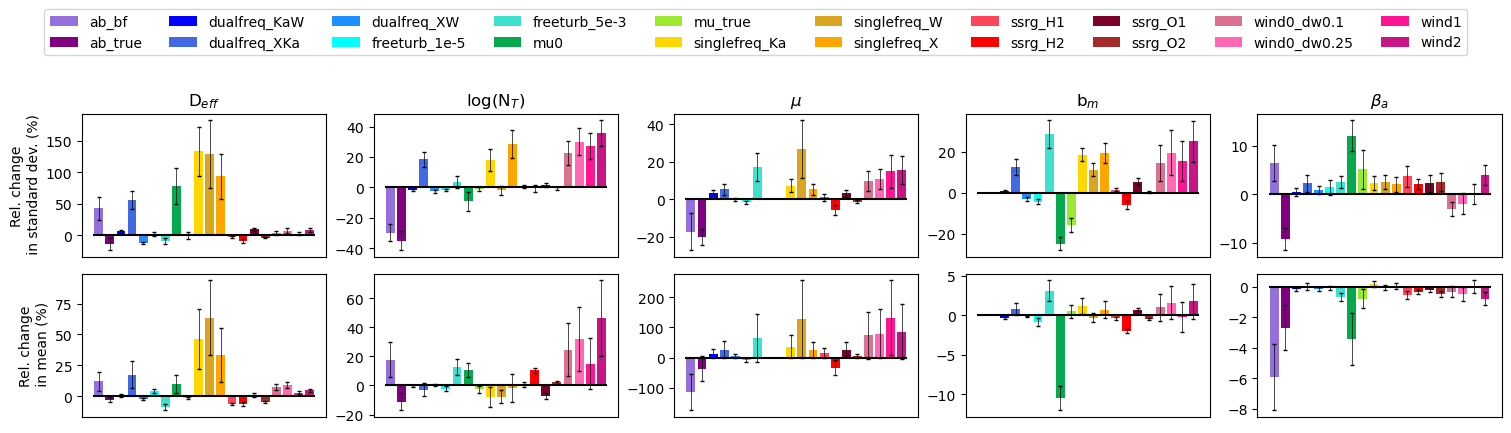

In [9]:
alpha=1
metrics_list = sorted(glob.glob('metrics/*__metrics.csv'))
n_lines = len(metrics_list)
colors = ['mediumpurple', 'purple', 'blue', 'royalblue', 'dodgerblue', 'cyan', 'turquoise','#06a94d', '#9be931', 'gold', 'goldenrod','orange', '#fd4659', 'red', '#7b002c','brown','palevioletred', 'hotpink', 'deeppink', 'mediumvioletred','grey', 'k', 'g', 'b']

vars_to_plot = ['Deff', 'logM0', 'b_mass_size', 'beta_area_size', 'mu']
vars_to_plot = {'b_mass_size':{'index':3,'title':'b$_{m}$','log_scale':False},
                'Deff':{'index':0,'title':'D$_{eff}$','log_scale':False},
                'logM0':{'index':1,'title':'log(N$_T$)','log_scale':False},
                'mu':{'index':2,'title':r'$\mu$','log_scale':False},
                'beta_area_size':{'index':4,'title':r'$\beta_{a}$','log_scale':False}
                }

fig, axs = plt.subplots(2,len(vars_to_plot),figsize=(3*len(vars_to_plot),3.4), constrained_layout=True)

for var in vars_to_plot.keys():# i_v, var in enumerate(vars_to_plot):#bs.keys()[1:]):
    i_v = vars_to_plot[var]['index']
    i_color = 0
    for i_f, f in enumerate(metrics_list):
        if 'baseline' in f:
            continue
        
        # baseline statistics
        q10_bs = bs[var].iloc[0][1:-1].split(', ')
        q10_bs = np.array([float(i) for i in q90_bs])
        q90_bs = bs[var].iloc[4][1:-1].split(', ')
        q90_bs = np.array([float(i) for i in q90_bs])
        iqr_bs = q90_bs - q90_bs # IQR 0.1-0.9

        median_bs = bs[var].iloc[2][1:-1].split(', ')
        median_bs = np.array([float(i) for i in median_bs]) # median
        
        # statistics from sensitivity test
        df = pd.read_csv(f)

        q10 = df[var].iloc[0][1:-1].split(', ')
        q10 = np.array([float(i) for i in q90])
        q90 = df[var].iloc[4][1:-1].split(', ')
        q90 = np.array([float(i) for i in q90])
        iqr_df = q90 - q10 # IQR 0.1-0.9

        median_df = df[var].iloc[2][1:-1].split(', ')
        median_df = np.array([float(i) for i in median_df])
        
        mean_iqr = ((iqr_df-iqr_bs)/std_bs*100).mean()
        stderr_iqr = ((iqr_df-iqr_bs)/iqr_bs*100).std()/np.sqrt(len(iqr_df))
        axs[0,i_v].bar(i_color,mean_iqr,color=colors[i_color],label=f.split('/')[1].split('__')[0])
        axs[0,i_v].plot([i_color, i_color],[mean_iqr-stderr_iqr, mean_iqr+stderr_iqr],color='k',lw=.5,marker='_',ms=3)
        
        mean_med = ((median_df-median_bs)/median_bs*100).mean()
        stderr_med = ((median_df-median_bs)/median_bs*100).std()/np.sqrt(len(median_df))
        axs[1,i_v].bar(i_color,mean_med,color=colors[i_color],label=f.split('/')[1].split('__')[0])
        axs[1,i_v].plot([i_color, i_color],[mean_med-stderr_med, mean_med+stderr_med],color='k',lw=.5,marker='_',ms=3)
        
        i_color +=1

    # horizontal black line
    axs[0,i_v].hlines(0,-0.5,i_color-.5,'k')
    axs[1,i_v].hlines(0,-0.5,i_color-.5,'k')


    axs[0,i_v].set_title(vars_to_plot[var]['title'])

for ax in axs.flatten():
    ax.set_xticks([])
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.5,1.25), loc='upper center', ncol=int((i_color+1)/2))

axs[0,0].set_ylabel('Rel. change in \n IQR$_{0.1-0.9}$ (%)')
axs[1,0].set_ylabel('Rel. change\n in median (%)')

fig.savefig(figpath, dpi=300, bbox_inches='tight', facecolor='w')
